In [315]:
import pandas as pd
import numpy as np

In [316]:
df = pd.read_csv('Weather_and_energy_Final_2020_2021.csv')
df

,Name,Date time,Energy Discharged (Wh),Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Black Mountain, NC 28711, United States",2/1/2020,9929,48.5,34.1,39.2,32.0,NaN,0.04,0.0,0.0,7.5,245.83,NaN,5.9,34.2,85.64,"Rain, Partially cloudy"
1,"Black Mountain, NC 28711, United States",2/2/2020,24392,65.1,32.8,45.5,28.1,NaN,0.00,0.0,0.0,8.8,235.00,20.8,9.9,1.9,54.15,Clear
2,"Black Mountain, NC 28711, United States",2/3/2020,16943,69.5,32.3,50.5,29.1,NaN,0.00,0.0,0.0,6.6,65.00,NaN,9.9,0.0,54.81,Clear
3,"Black Mountain, NC 28711, United States",2/4/2020,2103,61.1,50.8,55.2,NaN,NaN,0.00,0.0,0.0,7.1,153.48,16.1,9.9,38.6,62.09,Partially cloudy
4,"Black Mountain, NC 28711, United States",2/5/2020,1908,59.6,54.2,56.5,NaN,NaN,0.52,0.0,0.0,11.3,159.13,29.8,7.8,47.5,91.36,"Rain, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,"Black Mountain, NC 28711, United States",2/24/2021,25591,65.0,30.0,48.6,42.7,NaN,0.00,0.0,0.0,9.0,196.38,25.3,9.9,0.0,53.47,Clear
389,"Black Mountain, NC 28711, United States",2/25/2021,25795,63.3,35.6,51.0,42.3,NaN,0.00,0.0,0.0,7.3,274.17,17.2,9.9,5.0,51.25,Clear
390,"Black Mountain, NC 28711, United States",2/26/2021,1905,47.8,38.0,41.9,32.9,NaN,0.73,0.0,0.0,7.2,178.79,NaN,6.7,43.7,80.40,"Rain, Partially cloudy"
391,"Black Mountain, NC 28711, United States",2/27/2021,18946,63.2,38.4,52.2,35.0,NaN,0.01,0.0,0.0,5.6,149.13,NaN,8.8,40.3,83.28,"Rain, Partially cloudy"


Let's first analyse what data we have. We see there are 17 columns, of types float, int and objects. We also see that columns *Wind Chill, Heat Index and Wind Gust* have null values, but before we could deal with them, we need to visualise their correlation.

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    393 non-null    object 
 1   Date time               393 non-null    object 
 2   Energy Discharged (Wh)  393 non-null    int64  
 3   Maximum Temperature     393 non-null    float64
 4   Minimum Temperature     393 non-null    float64
 5   Temperature             393 non-null    float64
 6   Wind Chill              187 non-null    float64
 7   Heat Index              78 non-null     float64
 8   Precipitation           393 non-null    float64
 9   Snow                    393 non-null    float64
 10  Snow Depth              393 non-null    float64
 11  Wind Speed              393 non-null    float64
 12  Wind Direction          393 non-null    float64
 13  Wind Gust               208 non-null    float64
 14  Visibility              393 non-null    fl

In [318]:
df['Date time'] = pd.to_datetime(df['Date time'])

As we can see, we have quite many features. If we look at the columns with null values, we see that they have a very small correlation with the target column, *Energy Discharged (Wh)*. Hence, it is safe to just drop them.

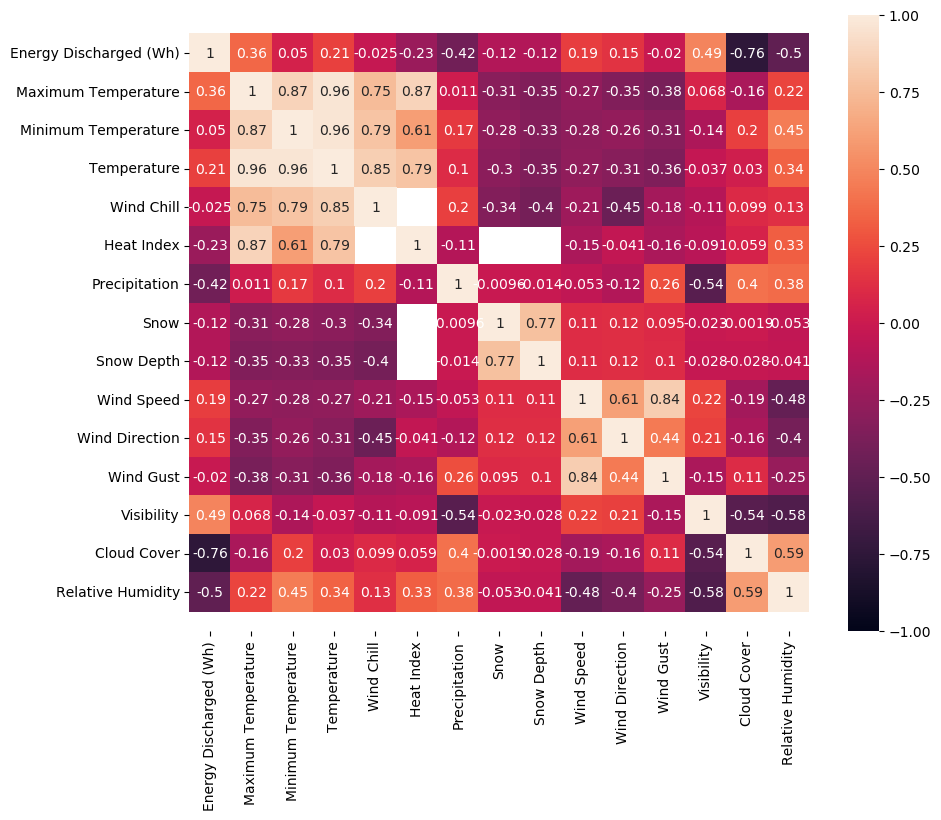

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [320]:
df2 = df.drop(columns=['Wind Chill','Heat Index','Wind Gust'])

### *Feature Selection*

We will use an PValue Selector algorithm from the kydavra library.

In [321]:
!pip install kydavra

P-value stands for 'probability value'; it tells how likely it is that a result occurred by chance alone. Basically, the p-value is used in hypothesis testing to help you support or reject the null hypothesis. The smaller the p-value, the stronger the evidence to reject the null hypothesis.

In [322]:
from kydavra import PValueSelector
pvalue_selector = PValueSelector()
selected_columns = pvalue_selector.select(df2.select_dtypes('number'), 'Energy Discharged (Wh)')

In [323]:
selected_columns

['Maximum Temperature',
 'Minimum Temperature',
 'Precipitation',
 'Wind Speed',
 'Wind Direction',
 'Visibility',
 'Cloud Cover']

When we look at the correlation between the selected features, we see that *maximum* and *minimum* temperature have a high correlation between them. That is a problem of multicolinearity. Hence, one of the features should be droped. We'll drop the Minimal temperature column. Besides this, we will drop the *Visibility* too due to the high correlation with the *Cloud Coverage* column.

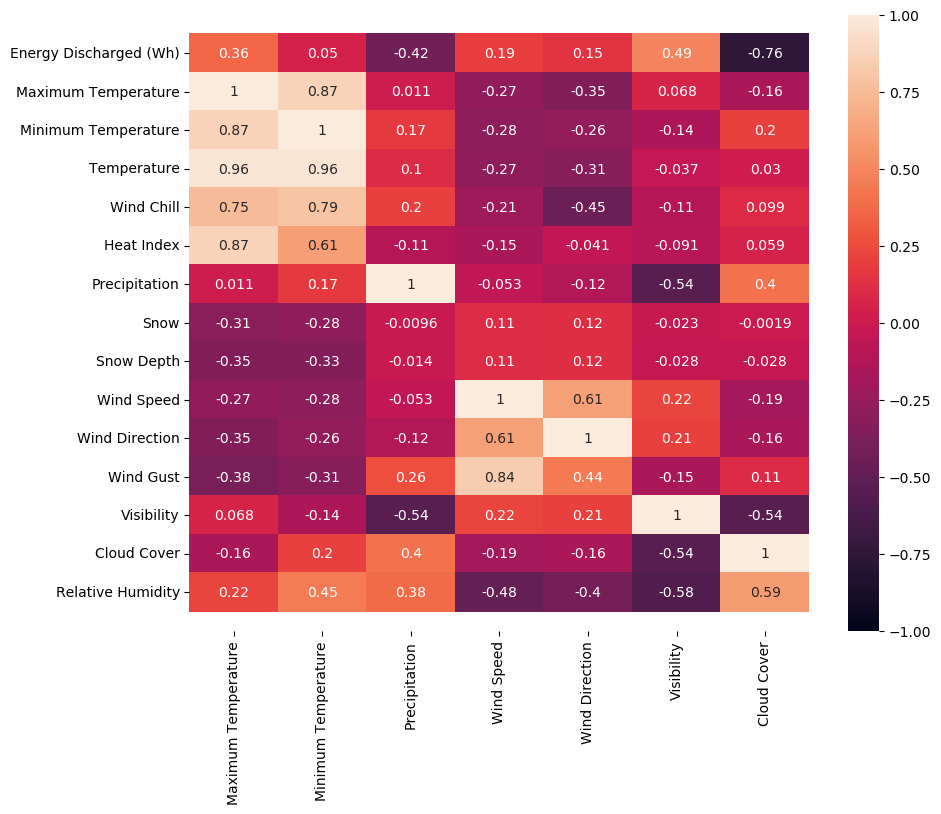

In [324]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()[['Maximum Temperature','Minimum Temperature','Precipitation','Wind Speed','Wind Direction','Visibility','Cloud Cover']]

plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [325]:
df_train = df[['Date time','Maximum Temperature','Precipitation','Cloud Cover','Energy Discharged (Wh)']]
df_train

,Date time,Maximum Temperature,Precipitation,Cloud Cover,Energy Discharged (Wh)
0,2020-02-01,48.5,0.04,34.2,9929
1,2020-02-02,65.1,0.00,1.9,24392
2,2020-02-03,69.5,0.00,0.0,16943
3,2020-02-04,61.1,0.00,38.6,2103
4,2020-02-05,59.6,0.52,47.5,1908
...,...,...,...,...,...
388,2021-02-24,65.0,0.00,0.0,25591
389,2021-02-25,63.3,0.00,5.0,25795
390,2021-02-26,47.8,0.73,43.7,1905
391,2021-02-27,63.2,0.01,40.3,18946


### *Data Analysis*
We will analyze the distribution of our data and its form, along with some statistics.

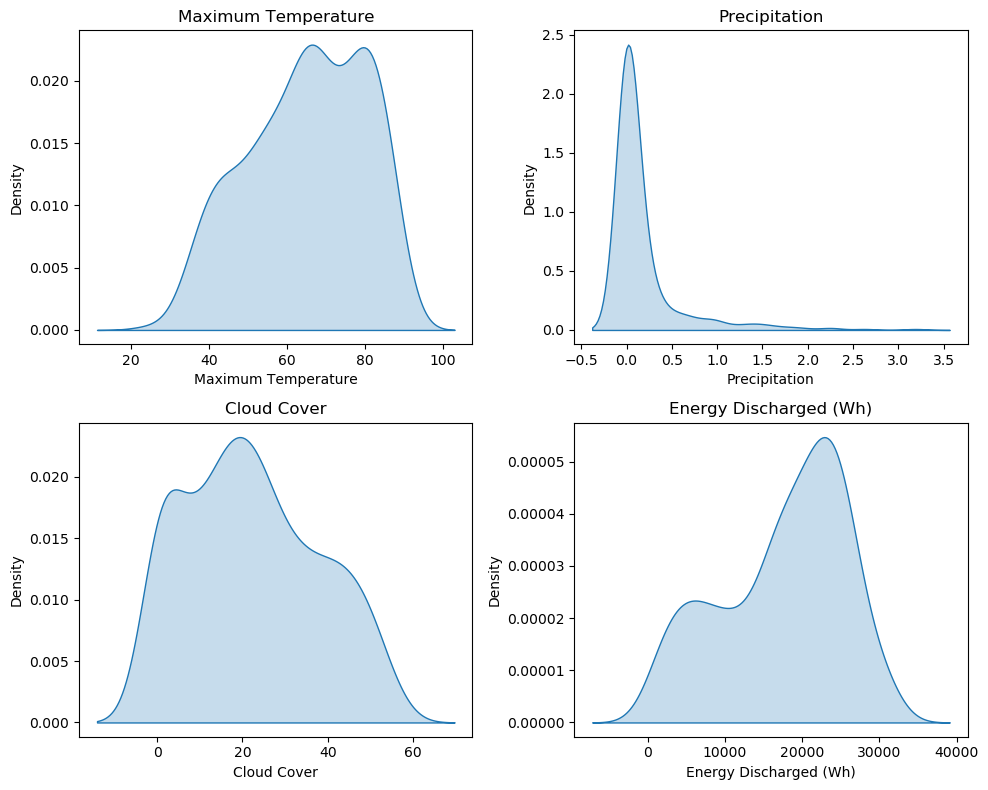

In [51]:
plt.figure(figsize=(10, 8))
n = 4
for i in range(n):
    plt.subplot(n//2, 2, i+1)
    sns.kdeplot(df_train.iloc[:,i+1], fill=True)
    plt.title(df_train.columns[i+1])
plt.tight_layout()
plt.show()

In [52]:
df_train.select_dtypes('number').skew(axis=0)

Maximum Temperature      -0.331115
Precipitation             3.597819
Cloud Cover               0.276716
Energy Discharged (Wh)   -0.496156
dtype: float64

In [53]:
df_train.select_dtypes('number').kurt(axis=0)

Maximum Temperature       -0.877830
Precipitation             15.284352
Cloud Cover               -0.943238
Energy Discharged (Wh)    -0.797492
dtype: float64

In [326]:
df_train = df_train.sort_values(by = ['Date time'])

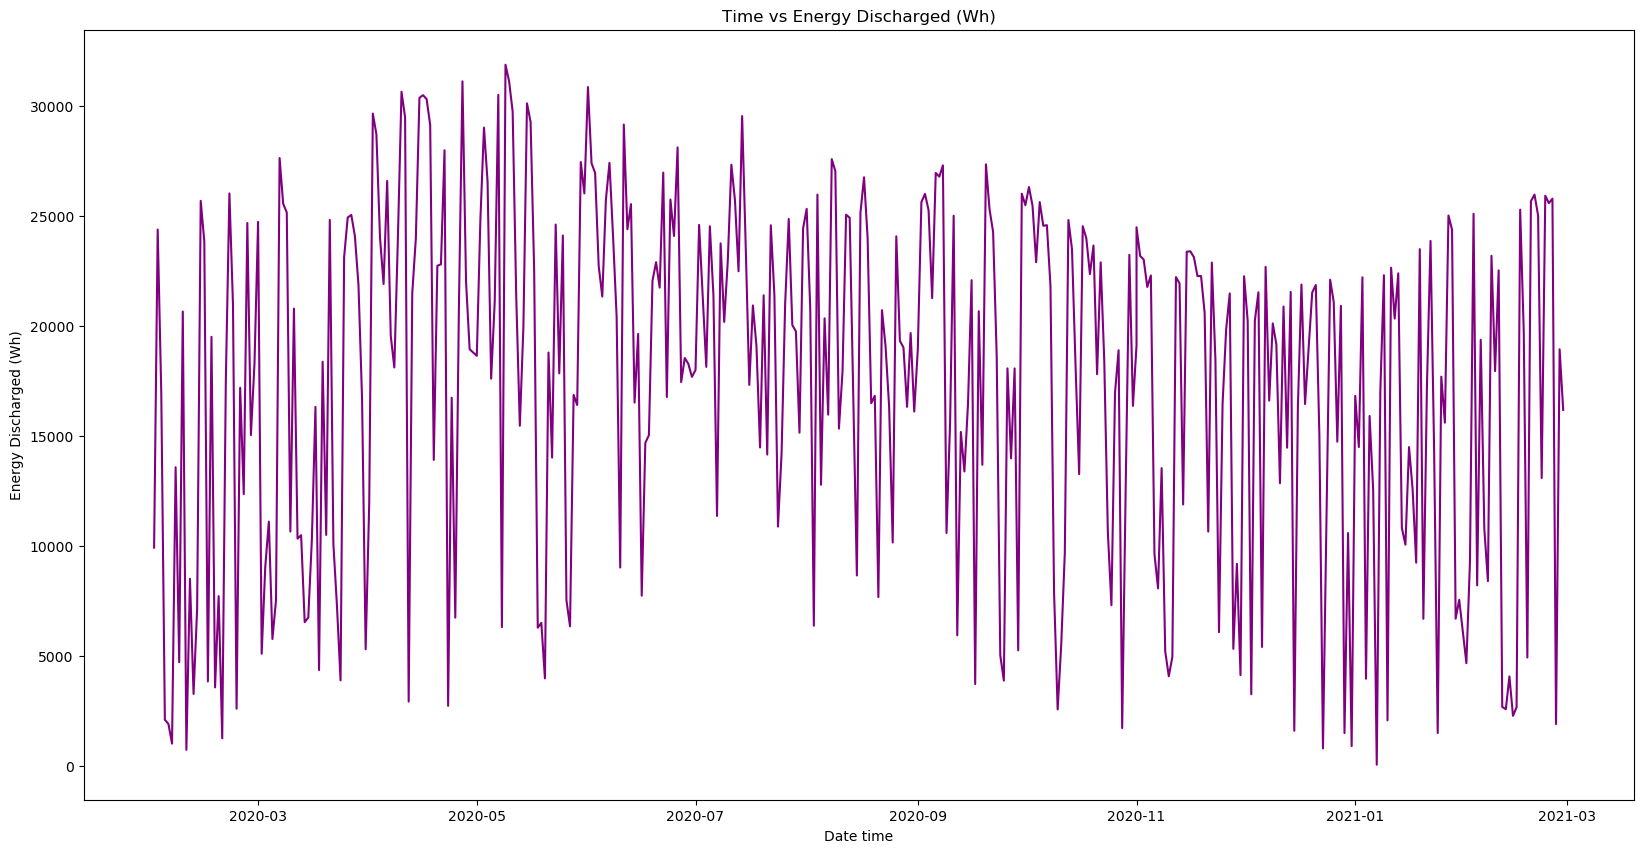

In [327]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df_train['Date time'],
        df_train['Energy Discharged (Wh)'],
        color='purple')

ax.set(xlabel="Date time",
       ylabel="Energy Discharged (Wh)",
       title="Time vs Energy Discharged (Wh)")

plt.show()

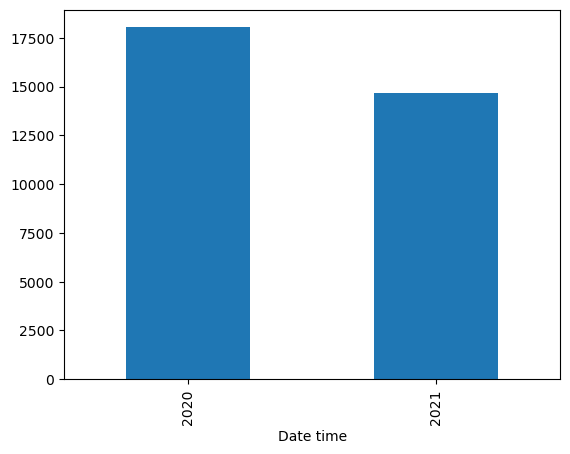

In [328]:
time = df_train.groupby(df_train['Date time'].dt.year)['Energy Discharged (Wh)'].mean()
time.plot(x='Years', y='Energy Discharged (Wh)', kind='bar')
plt.show()

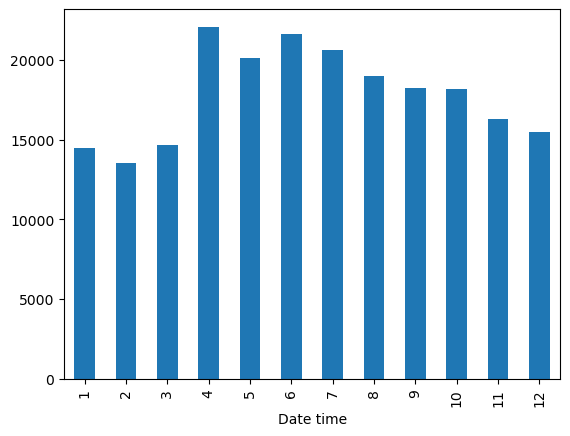

In [329]:
time = df_train.groupby(df_train['Date time'].dt.month)['Energy Discharged (Wh)'].mean()
time.plot(x='Months', y='Energy Discharged (Wh)', kind='bar')
plt.show()

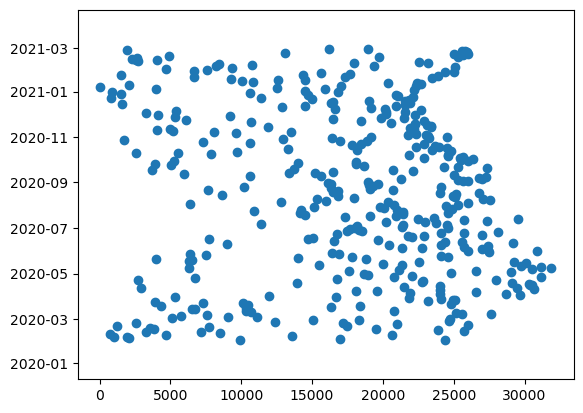

In [330]:
plt.scatter(df_train['Energy Discharged (Wh)'],df_train['Date time'])
plt.show()

### *Box plot*        

Next lets apply the box plot on the data. It will let us know how data is distributed based on 5 values: minim and maximal values, median and quartile values.

In [59]:
!pip install plotly

As we can see, the median of the value is a little higher and the above percentile is narrower than the bottom one. It means that there are more values higher than the median value and less lower, hence the median is shifted above.

In [60]:
import plotly.express as px
df = px.data.tips()
fig = px.box(df_train, y="Energy Discharged (Wh)")
fig.show()

### *Outliers*
Next we are gonna analyze our dataset for outliers. Since the form of the dataset distribution we are gonna apply Local Outlier Factor. The Local Outlier Factor is an outlier detection algorithm based on the concept of locating the examples that are far from the other examples in the feature space. Each of the examples is assigned a scoring of how likely it is to be an anomaly based on the size of its local neighborhood - the bigger the score, the more it is probable that they are outliers.

In [61]:
from sklearn.neighbors import LocalOutlierFactor
model=LocalOutlierFactor()
df_train['outlier']=pd.Series(model.fit_predict(df_train.iloc[:,1:].values))

In [79]:
df_train.loc[df_train['outlier']==-1,:]

,Date time,Maximum Temperature,Precipitation,Cloud Cover,Energy Discharged (Wh),outlier
341,2021-01-07,35.4,0.17,53.2,58,-1


### *Machinel Learning Algorithms*
Next we are gonna apply some regression algorithms for predicting the energy production and analyze their accuracy.

First thing we are gonna divide out dataset in 2 parts: one for training and one for testing the accuracy of prediction.

In [307]:
from sklearn.model_selection import train_test_split
X = df_train.drop(columns = ['Energy Discharged (Wh)','Date time','outlier']).values
y = df_train['Energy Discharged (Wh)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Before we feed the data to the algorithmwe will apply the standard scaler.
The data contains features of various dimensions and scales altogether. Different scales of the data features affect the modeling of a dataset adversely. It leads to a biased outcome of predictions in terms of misclassification error and accuracy rates. Thus, it is necessary to Scale the data prior to modeling.

In [308]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train)
X_test_tr = scaler.transform(X_test)

**Linear Regression** is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. We'll apply the simple linear regression.

In [309]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_tr, np.log(y_train))
y_pred = lr.predict(X_test_tr)
mean_absolute_error(np.exp(y_pred),y_test)

4749.518528230276

As we can see the error of the algorithm is quite high. Based on the form of our data scatter, we understand that a linear model is not the best way to predict new values since the form of the data does not reassembe a line, but rather a circle.

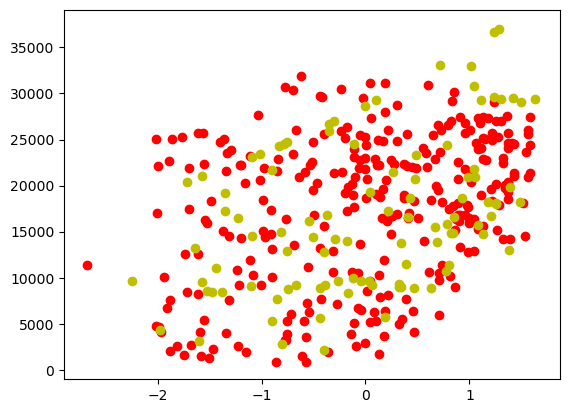

In [310]:
plt.scatter(X_train_tr[:,0], y_train ,color='r') 
plt.scatter(X_test_tr[:,0], np.exp(y_pred), color='y')
plt.show()

**Decision Tree** builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [304]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train_tr, y_train)
y_pred = dtr.predict(X_test_tr)
dtr.score(X_test_tr, y_test)

0.40917322764803254

The accuracy is quite good, 40%. But we can go even further and apply a Random Forest Regression algorithm, which uses multiple decision trees to predict a value more accurately.

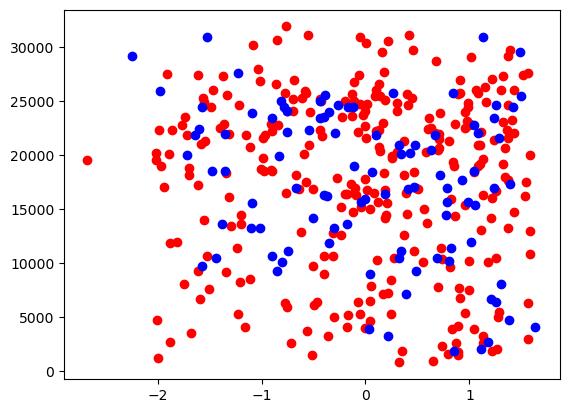

In [305]:
plt.scatter(np.sort(X_train_tr[:,0],axis=0), y_train, color = 'red')
plt.scatter(np.sort(X_test_tr[:,0],axis=0), y_pred, color = 'blue')
plt.show()

**Random Forest Regressor** is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [311]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train_tr, y_train)
y_pred = rfr.predict(X_test_tr)
rfr.score(X_test_tr, y_test)

0.6175170268144725

That's it, we have a 61% accuracy. 

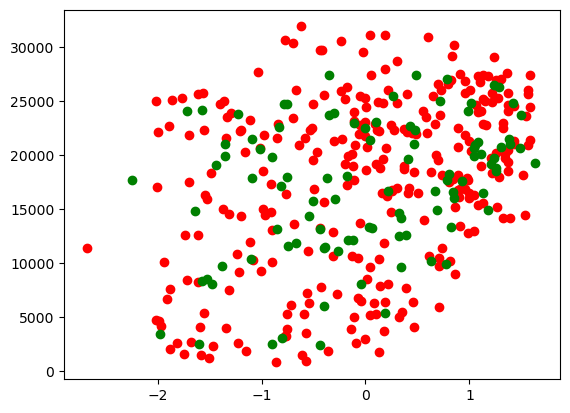

In [303]:
plt.scatter(X_train_tr[:,0], y_train, color = 'red')
plt.scatter(X_test_tr[:,0], y_pred, color = 'green')
plt.show()